In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import re
import torch
from bertopic import BERTopic
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModel

C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distanc

In [2]:
#Import the data from the JSON file
print("Importing data and building DataFrame:")
start_time = time.time()
with open('data/cleanedAggregateData.json', 'r') as f:
    data = json.load(f)
end_time = time.time()
load_time = end_time - start_time
print("Data load time", load_time)
print(data[0])

Importing data and building DataFrame:
Data load time 0.01299905776977539
{'id': 'EJ1013917', 'title': 'Enhancing the Autonomous Use of CALL: A New Curriculum Model in EFL', 'author': 'Smith, Karen, Craig, Hana', 'description': "This action research study evaluates the effectiveness of a CALL Learner Autonomy (CALL LA) course at a Japanese university. The &quot;C course&quot; blends face-to-face instruction and independent study in a CALL environment. It aims to enhance learners' autonomous use of CALL in the acquisition of English as a Foreign Language (EFL). In this study, three learning support aids were trialed: the Learner Passport, the e-Language Learning Portfolio and the e-Learner Self-Reflection Diary. The participant- researchers examined the course using data from the trial materials, observation, their own reflexive practice, learner questionnaires, interviews, artifacts and learner self-reflections. Findings indicate that teachers' and learners' consciousness was raised ab

In [3]:
#Create dataframe
print("Data loaded, converting to DataFrame")
start_time = time.time()
df = pd.DataFrame(data)
end_time = time.time()
convert_time = end_time - start_time
print("Data successfully converted to DataFrame. Conversion time:", convert_time)

Data loaded, converting to DataFrame
Data successfully converted to DataFrame. Conversion time: 0.004996061325073242


In [4]:
# Load the SciBERT tokenizer and model
docs = df.title.tolist()
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')
encoded_docs = [tokenizer.encode(doc, add_special_tokens=True) for doc in docs]

# Convert the encoded documents back to strings
decoded_docs = [tokenizer.decode(doc) for doc in encoded_docs]

# Initialize BERTopic with the SciBERT embedding model
embedding_model = (model, tokenizer)
model = BERTopic(verbose=True, embedding_model=embedding_model)

# Fit the model on the decoded documents
topics, probabilities = model.fit_transform(decoded_docs)

# Get topics over time
pub_dates = df.publicationdateyear.tolist()
topics_over_time = model.topics_over_time(decoded_docs, pub_dates)

# Get topic information
model.get_topic_info()


Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Batches: 100%|██████████| 39/39 [00:08<00:00,  4.44it/s]
2023-06-18 07:43:36,032 - BERTopic - Transformed do

,Topic,Count,Name,Representation,Representative_Docs
0,-1,399,-1_sep_cls_of_and,"[sep, cls, of, and, in, the, language, learnin...",[[CLS] the effects of technology - integrated ...
1,0,156,0_writing_feedback_collaborative_automated,"[writing, feedback, collaborative, automated, ...",[[CLS] effects of computer - mediated collabor...
2,1,61,1_mobile_learning_language_assisted,"[mobile, learning, language, assisted, smartph...",[[CLS] moving bravely towards mobile learning ...
3,2,61,2_intercultural_telecollaboration_competence_t...,"[intercultural, telecollaboration, competence,...",[[CLS] developing intercultural competence thr...
4,3,53,3_language_learning_assisted_computer,"[language, learning, assisted, computer, techn...",[[CLS] technologies for foreign language learn...
5,4,45,4_vocabulary_acquisition_glosses_dictionaries,"[vocabulary, acquisition, glosses, dictionarie...",[[CLS] hypertext glosses for foreign language ...
6,5,45,5_pronunciation_speech_training_recognition,"[pronunciation, speech, training, recognition,...",[[CLS] automatic pronunciation assessment vs. ...
7,6,44,6_game_games_digital_playing,"[game, games, digital, playing, gaming, play, ...",[[CLS] the linguistic environments of digital ...
8,7,40,7_oral_communication_chat_mediated,"[oral, communication, chat, mediated, computer...",[[CLS] computer - mediated communication ( cmc...
9,8,35,8_teachers_technology_technological_pedagogical,"[teachers, technology, technological, pedagogi...",[[CLS] a critical review of research on techno...


In [17]:
#helper function to create WordClouds
def create_wordcloud(model, topic):
     text = {word: value for word, value in model.get_topic(topic)}
     wc = WordCloud(background_color="white", max_words=1000)
     wc.generate_from_frequencies(text)
     plt.imshow(wc, interpolation="bilinear")
     plt.axis("off")
     plt.show()

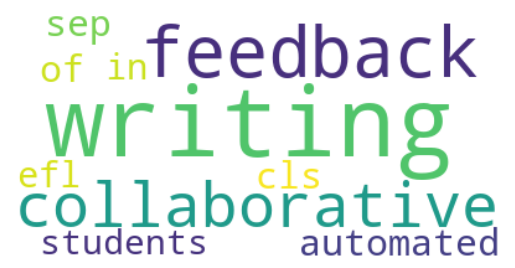

In [24]:
create_wordcloud(model, topic=0)

In [19]:
model.visualize_topics()

In [25]:
topics_to_include = list(range(0, 25))
model.visualize_barchart(topics= topics_to_include, width=300)

In [21]:
model.visualize_hierarchy()

In [22]:
hierarchical_topics = model.hierarchical_topics(docs)
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [00:00<00:00, 315.78it/s]


In [23]:
model.visualize_heatmap()

In [26]:
model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 3, 4, 5, 6, 7, 8, 9])
#can innclude topics changing topics_over_time TO topics_over_time, topics=[x, y, z, etc.]

In [27]:
model.visualize_topics_over_time(topics_over_time, topics=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [29]:
model.visualize_topics_over_time(topics_over_time, topics=[20, 21, 22, 23, 24])
#COVID-19 Topic
#meta studies

In [30]:
model.visualize_topics_over_time(topics_over_time)

In [31]:
#Extract topics-document assignments
document_topics = []
for i, topic in enumerate(topics):
    document_id = df.loc[i, 'id']
    document_title = df.loc[i, 'title']
    document_topics.append({'id': document_id, 'title': document_title, 'topic': topic})
    #Export to JSON
with open('scibert_titles_topics.json', 'w') as f:
    json.dump(document_topics, f)